---

# **TELCO COMPANY CUSTOMER CHURN**

**Nama  : Yunido Baheramsyah**

Program ini dibuat untuk menganalisa faktor-faktor yang memperngaruhi customer churn di perusahaan telekomunikasi yang akan mempengaruhi kebijakan perusahaan dalam menurunkan churn rate.

URL Tableau : https://public.tableau.com/app/profile/yunido.baheramsyah/viz/CustomerChurnAnalysis_17502595278150/DataVisualization?publish=yes

---

# **I. INTRODUCTION**

**Topik Permasalahan & Latar Belakang**

Customer churn pada perusahaan telekomunikasi (Telco) masih cukup tinggi, yaitu sekitar 26%. Saya sebagai Freelance Data Analyst diminta untuk mengidentifikasi faktor-faktor utama penyebab churn menggunakan visualisasi data dan analisis statistik, serta menghasilkan dashboard untuk mendukung keputusan manajemen dalam menurunkan churn rate menjadi minimal 10%

**SMART Method**

Metode SMART akan digunakan untuk menjadi kerangka kerja analisis ini, berikut penjabarannya:
- **Specific:** erusahaan ingin memahami faktor-faktor utama yang memengaruhi churn pelanggan, terutama terkait jenis kontrak, metode pembayaran, durasi berlangganan, layanan internet, dan biaya bulanan.
- **Measurable:** Laporan akan menghasilkan analisis dengan tingkat akurasi prediksi churn minimal 80%, dan menghasilkan insight visual berbasis grafik untuk faktor - faktor utama churn.
- **Achievable:** Analisis berbasis dataset 7043 pelanggan yang sudah tersedia, menggunakan eksplorasi data statistik dan visualisasi dengan tools Python.
- **Relevant:** Hasil laporan ini mendukung tim marketing dan customer service untuk menyusun program loyalitas dan menurunkan churn minimal 10% dalam 6 bulan ke depan.
- **Time-bound:** Diselesaikan dalam 2 minggu.

---

# **II. PROBLEM STATEMENT AND DATASET DESCRIPTION**

**Problem Statement**

Perusahaan ingin secara spesifik memahami faktor-faktor utama yang memengaruhi churn pelanggan, terutama dari sisi jenis kontrak, metode pembayaran, durasi berlangganan, layanan internet, dan biaya bulanan. Untuk itu, akan dilakukan analisis terukur berupa visualisasi dan eksplorasi data terhadap minimal 5 faktor utama yang berkaitan dengan churn, serta diarahkan pada prediksi churn dengan akurasi minimal 80% apabila dilakukan pemodelan. Proyek ini dapat dicapai karena menggunakan dataset historis yang berisi 7.043 data pelanggan dan akan dianalisis menggunakan metode statistik dan visualisasi dengan tools Python seperti pandas, seaborn, dan matplotlib. Analisis ini sangat relevan untuk mendukung tim marketing dan customer service dalam menyusun strategi loyalitas pelanggan serta menurunkan angka churn minimal 10% dalam enam bulan ke depan. Seluruh proses analisis dan pelaporan ditargetkan selesai dalam jangka waktu 2 minggu untuk presentasi awal kepada manajemen.

Pertanyaan-pertanyaan penelitian yang akan dijawab melalui analisis dataset ini adalah melalui (metode 5W1H), adalah:
1. Siapa pelanggan yang paling banyak churn?
2. Apakah pelanggan churn membayar lebih mahal?
3. Layanan mana yang paling banyak churn rate-nya?
4. Kapan churn lebih sering terjadi?
5. Bagaimana karakteristik biaya pelanggan yang churn dibandingkan dengan pelanggan aktif?
6. Apakah hubungan kontrak dan churn signifikan?

**Tujuan Report**

- Mengidentifikasi faktor utama penyebab churn pelanggan, seperti kontrak, biaya bulanan, layanan tambahan, atau metode pembayaran.
- Membantu tim marketing dan customer service memahami kelompok pelanggan yang berisiko tinggi untuk churn.
- Menyediakan visualisasi data yang jelas agar manajemen dapat melihat pola churn dengan cepat.
- Menyusun rekomendasi berbasis data untuk mendukung strategi retensi pelanggan yang lebih efektif.

**User/Client Pembaca Report**

- **Top Management (C-Level):** Untuk pengambilan keputusan strategis.
- **Divisi Marketing:** Untuk merancang program loyalitas dan retensi.
- **Divisi Customer Service:** Untuk fokus pada pelanggan berisiko churn tinggi.

**Dataset**

- **Sumber:** Kaggle - [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- **Format:** CSV
- **Deskripsi:** Data pelanggan Telco, berisi informasi demografi, kontrak, metode pembayaran, biaya, dan status churn.

---

# **III. DATA LOADING**

In [ ]:
# import libraries
import pandas as pd

In [17]:
# Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Tampilkan 5 baris pertama
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


>Import library yang diperlukan seperti dari Pandas, Scipy, dan sebagainya.

In [18]:
# Tampilkan info dataset
df.info()

# Tampilkan ringkasan statistik awal
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


> **Insight**:
- Tidak ada missing value
- Kolom TotalCharges bertipe data objek, seharusnya numerik(float)

> **Solusi**:
- Data Cleaning
- Ubah tipe data di kolom TotalCharges ke float
- Tangani jika ada nilai NaN

In [19]:
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

> df.keys() digunakan untuk memperoleh informasi ringkas tentang DataFrame yang ada. DataFrame adalah struktur data tabular yang disediakan oleh Pandas untuk memanipulasi dan menganalisis data

---
# **IV. DATA CLEANING**

Pada fase data cleaning akan dilakukan proses data understanding, handling missing values, mengganti nama kolom, dan mengubah format data dalam kolom.

In [20]:
# Cek missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> Data tidak mengandung missing value

In [21]:
# ubah tipe data di kolom TotalCharge dari string ke Float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


> Kolom `TotalCharges` sudah bertipe numerik(float)

In [22]:
# hitung berapa jumlah nilai Nan di kolom TotalCharges
df['TotalCharges'].isna().sum()

np.int64(11)

> Ada 11 nilai NaN di kolom TotalCharges

In [23]:
# Drop row dengan yang terdapat nilai NaN di 
df_clean = df.dropna(subset=['TotalCharges'])

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [24]:
# Standardisasi nama kolom
df_clean.columns = df_clean.columns.str.lower()

# cek ulang
df_clean

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**Insight**:

- Data sudah bersih
- Tipe data sudah sesuai dengan kolom
- Data sudah siap digunakan untuk dianalisa

---

# **V. EXPLORATION AND ANALYSIS**

**Visualisasi Data**

**1. Siapa pelanggan yang paling banyak churn?**

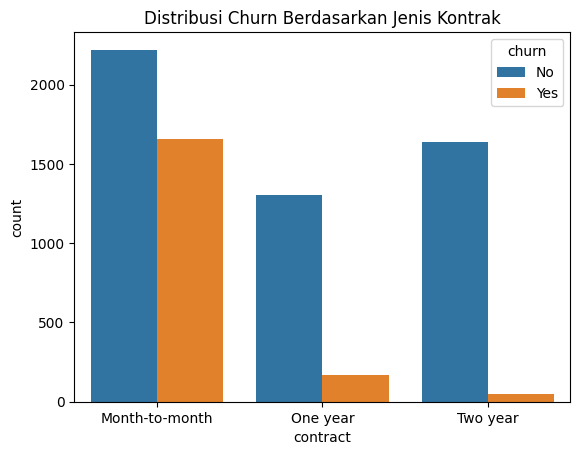

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi 1
sns.countplot(data=df_clean, x='contract', hue='churn')
plt.title('Distribusi Churn Berdasarkan Jenis Kontrak')
plt.show()

> **Insight**: Visualisasi ini menunjukkan bahwa pelanggan dengan kontrak month-to-month memiliki tingkat churn yang jauh lebih tinggi dibandingkan pelanggan dengan kontrak satu tahun atau dua tahun. Artinya, pelanggan yang tidak terikat kontrak jangka panjang lebih mudah untuk berhenti berlangganan. Hal ini wajar karena pelanggan dengan kontrak jangka pendek tidak menghadapi hambatan finansial (seperti penalti) ketika memutuskan untuk berhenti.

**2. Apakah pelanggan yang churn membayar biaya langganan lebih mahal?**

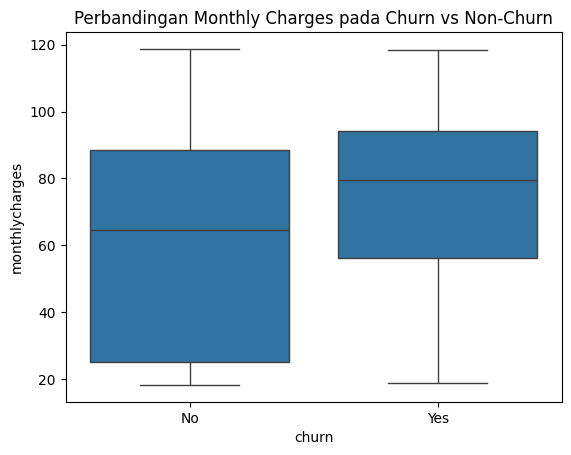

In [26]:
# Visualisai 2
sns.boxplot(data=df_clean, x='churn', y='monthlycharges')
plt.title('Perbandingan Monthly Charges pada Churn vs Non-Churn')
plt.show()

> **Insight**: Hasil boxplot memperlihatkan bahwa rata-rata biaya bulanan (monthly charges) pelanggan yang churn lebih tinggi dibandingkan pelanggan yang tetap berlangganan. Bahkan terlihat adanya pelanggan churn dengan biaya bulanan pada rentang tertinggi (outlier). Hal ini mengindikasikan bahwa beban biaya bulanan yang tinggi bisa menjadi salah satu penyebab utama pelanggan berhenti.

**3. Layanan mana yang paling banyak churn rate-nya?**

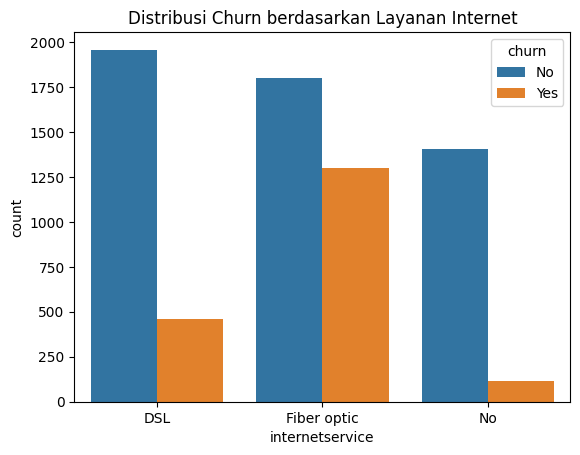

In [27]:
# Visualisasi 3
sns.countplot(data=df_clean, x='internetservice', hue='churn')
plt.title('Distribusi Churn berdasarkan Layanan Internet')
plt.show()

> **Insight**: Pelanggan yang menggunakan layanan fiber optic memiliki tingkat churn yang lebih tinggi dibanding pelanggan dengan DSL atau tanpa layanan internet. Hal ini dapat mencerminkan bahwa meskipun fiber optic menawarkan kecepatan lebih tinggi, pelanggan mungkin merasa layanan tersebut tidak memenuhi ekspektasi (misalnya dari sisi reliabilitas, harga, atau experience pengguna).

**4. Kapan churn rate cenderung lebih sering terjadi?**

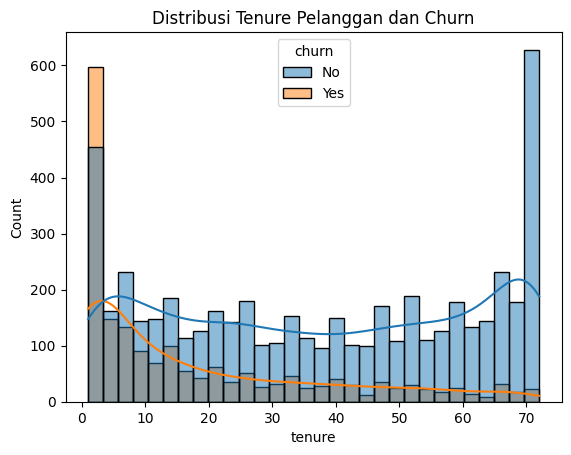

In [28]:
# Visualisasi 4
sns.histplot(data=df_clean, x='tenure', hue='churn', bins=30, kde=True)
plt.title('Distribusi Tenure Pelanggan dan Churn')
plt.show()

> **Insight**: Distribusi tenure menunjukkan bahwa churn paling sering terjadi pada pelanggan dengan masa langganan yang relatif singkat (di bawah 12 bulan). Semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka akan churn. Hal ini menguatkan pola umum bahwa churn cenderung terjadi di awal masa hubungan pelanggan dengan perusahaan.

**Statistika Deskriptif**

**5. Bagaimana karakteristik biaya pelanggan churn dibanding pelanggan aktif?**

In [29]:
mean = df_clean['monthlycharges'].mean()
median = df_clean['monthlycharges'].median()

print('Mean = ', mean)
print('Median = ', median)

Mean =  64.79820819112628
Median =  70.35


> Jika nilai median lebih besar dari nilai mean, maka ini menunjukkan bahwa distribusi data condong ke kiri (left skewed/negatively skewed), ini menandakan bahwa sebagian besar pelanggan membayar di atas rata-rata, tetapi ada beberapa pelanggan yang membayar sangat rendah, sehingga menarik nilai rata-rata ke bawah. Ada kemungkinan terdapat outlier atau sejumlah kecil pelanggan dengan biaya bulanan sangat rendah (mungkin karena diskon, paket promosi, atau layanan minimal), yang memengaruhi rata-rata menjadi lebih kecil dari median.



In [30]:
mean = df_clean['totalcharges'].mean()
median = df_clean['totalcharges'].median()

print('Mean = ', mean)
print('Median = ', median)

Mean =  2283.300440841866
Median =  1397.475


> Ketika nilai mean lebih besar daripada nilai median, maka distribusi data condong ke kanan bersifat positively skewed (right skewed). Ini berarti sebagian besar pelanggan memiliki total charges yang lebih rendah dari rata-rata. Namun, terdapat beberapa pelanggan dengan total charges yang sangat tinggi, sehingga menarik rata-rata ke atas. Ini menandakan adanya outlier di sisi kanan (pelanggan dengan penggunaan jangka panjang dan/atau tagihan tinggi).

In [31]:
std = df_clean['monthlycharges'].std()
variance = df_clean['monthlycharges'].var()
range = df_clean['monthlycharges'].max() - df_clean['monthlycharges'].min()

print('Standard Deviasi = ', std)
print('Variance = ', variance)
print('Range = ', range)

Standard Deviasi =  30.085973884049842
Variance =  905.1658245517292
Range =  100.5


In [32]:
std = df_clean['totalcharges'].std()
variance = df_clean['totalcharges'].var()
range = df_clean['totalcharges'].max() - df_clean['totalcharges'].min()

print('Standard Deviasi = ', std)
print('Variance = ', variance)
print('Range = ', range)

Standard Deviasi =  2266.771361883145
Variance =  5138252.407053568
Range =  8666.0


In [33]:
print(f"Skewness: {df_clean['monthlycharges'].skew()}") #--> distribusi data

print(f"\nKurtosis: {df_clean['monthlycharges'].kurtosis()}") #-->outlier

Skewness: -0.22210292770166232

Kurtosis: -1.256156424371879


In [34]:
print(f"Skewness: {df_clean['totalcharges'].skew()}") #--> distribusi data

print(f"\nKurtosis: {df_clean['totalcharges'].kurtosis()}") #-->outlier

Skewness: 0.9616424997242504

Kurtosis: -0.23179876086937945


In [35]:
q1 = df_clean['monthlycharges'].quantile(0.25)
q3 = df_clean['monthlycharges'].quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 3 * iqr
low_bound = q1 - 3 * iqr

print(f'Upper Boundary: {up_bound}')
print(f'Lower Boundary: {low_bound}')

Upper Boundary: 252.6875
Lower Boundary: -127.23749999999998


In [36]:
q1 = df_clean['totalcharges'].quantile(0.25)
q3 = df_clean['totalcharges'].quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 3 * iqr
low_bound = q1 - 3 * iqr

print(f'Upper Boundary: {up_bound}')
print(f'Lower Boundary: {low_bound}')

Upper Boundary: 13974.600000000002
Lower Boundary: -9778.4125


> Karakteristik biaya pelanggan yang churn cenderung memiliki biaya bulanan (MonthlyCharges) yang lebih tinggi, namun total biaya keseluruhan (TotalCharges) yang lebih rendah dibanding pelanggan aktif. Hal ini mengindikasikan bahwa mereka kemungkinan besar berhenti berlangganan dalam waktu singkat, meskipun membayar lebih mahal setiap bulannya. Sebaliknya, pelanggan yang tetap aktif memiliki biaya bulanan yang lebih rendah namun total biaya yang tinggi, mencerminkan loyalitas dan durasi penggunaan yang lebih lama. Temuan ini menyiratkan bahwa biaya bulanan yang tinggi di awal langganan bisa menjadi faktor pendorong churn, sehingga strategi retensi pelanggan dapat difokuskan pada edukasi nilai layanan dan penyesuaian paket harga di tahap awal langganan.




**Statistika Inferensial**

**6. Apakah hubungan kontrak dan churn signifikan?**

In [37]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(df_clean['contract'], df_clean['churn'])
chi2, p, dof, ex = chi2_contingency(ct)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 1179.5458287339445, p-value: 7.326182186265472e-257


> Berdasarkan hasil uji Chi-Square antara kontrak dan churn, diperoleh nilai statistik Chi-Square sebesar 1179.54 dengan p-value sebesar 7.33. Nilai p-value yang sangat kecil menunjukkan bahwa hasil uji ini sangat signifikan secara statistik. yang berarti terdapat perbedaan yang signifikan antara tipe kontrak dan churn.

---

# **VI. CONCLUSION**

Berdasarkan hasil analisis, ditemukan bahwa tingkat churn secara signifikan lebih tinggi pada pelanggan dengan kontrak bulanan (month-to-month), dibandingkan dengan kontrak jangka panjang seperti satu atau dua tahun. Pelanggan yang churn juga cenderung membayar biaya bulanan (monthly charges) lebih tinggi, yang dapat menjadi salah satu faktor ketidakpuasan atau persepsi kurangnya nilai layanan. Selain itu, layanan internet dengan tipe fiber optic menunjukkan tingkat churn yang lebih tinggi dibanding DSL, mengindikasikan kemungkinan adanya masalah pada layanan atau harga yang tidak sebanding dengan harapan pelanggan. Analisis distribusi menunjukkan bahwa churn paling sering terjadi pada pelanggan dengan masa berlangganan yang masih singkat (tenure rendah), memperkuat dugaan bahwa churn banyak terjadi di awal masa langganan. Secara statistik, uji Chi-Square membuktikan adanya hubungan yang signifikan antara jenis kontrak dan status churn (p-value < 0.05), yang menegaskan bahwa faktor kontrak merupakan elemen penting yang perlu diperhatikan dalam strategi retensi pelanggan.

**Rekomendasi**

Berdasarkan temuan analisis, langkah strategis yang dapat dilakukan untuk menurunkan angka churn adalah dengan mendorong pelanggan berkontrak bulanan (month-to-month) untuk beralih ke kontrak tahunan melalui pemberian insentif menarik seperti diskon atau bonus layanan tambahan. Selain itu, perlu dilakukan review terhadap struktur harga dan paket layanan, khususnya bagi pelanggan dengan MonthlyCharges tinggi, guna memastikan harga yang dibayarkan sebanding dengan nilai yang dirasakan. Hal ini penting untuk menghindari persepsi overcharged yang dapat mendorong pelanggan berhenti. Selanjutnya, perusahaan juga perlu mengevaluasi kualitas layanan internet fiber optic, karena tingkat churn yang tinggi pada layanan ini dapat mengindikasikan adanya masalah performa, stabilitas, atau kepuasan pelanggan. Kombinasi dari pendekatan ini diharapkan mampu meningkatkan loyalitas pelanggan dan menurunkan churn secara berkelanjutan.